In [14]:
# Imports
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble._bagging import BaggingClassifier
from sklearn.ensemble._forest import ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble._bagging import BaggingClassifier
from sklearn.metrics import confusion_matrix, fbeta_score

from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate, count
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.reductions import ExponentiatedGradient, ClassificationMoment, Moment, DemographicParity, GridSearch
from fairlearn.metrics import equalized_odds_difference, equalized_odds_ratio, false_negative_rate_difference, false_positive_rate_difference, true_positive_rate_difference, true_negative_rate_difference, demographic_parity_ratio, demographic_parity_difference

# Suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [15]:
data = "/Users/yanchenglai/Desktop/GSU/GRA/2023 Fall/TEDS_cleaned_2019_Yan.csv"

In [16]:
df = pd.read_csv(data)

Notes:
- Columsn to drop.
- LOS because L/S
- Services converted to L/S.

In [17]:
## Drop unnecassary columns
columns_to_drop = ["In/Out", "CASEID", "LOS", "SERVICES", "SERVICES_D"]
df = df.drop(columns=columns_to_drop)

In [18]:
df

DISYR  STFIPS  CBSA2010  EDUC  MARSTAT  DETCRIM  PSOURCE  NOPRIOR  \
0         2019       2        -9     4        1       -9        1        0   
1         2019       2        -9     3        1       -9        1        0   
2         2019       2        -9     2        1       -9        1        0   
3         2019       2        -9     3        1       -9        1        1   
4         2019       2        -9     3        3       -9        1        1   
...        ...     ...       ...   ...      ...      ...      ...      ...   
1722498   2019      56        -9     4        2       -9        1        0   
1722499   2019      56        -9     3        3        1        7        0   
1722500   2019      56        -9     2        1       -9        1        0   
1722501   2019      56        -9     1        1        3        7        0   
1722502   2019      56        -9    -9        4       -9        1        0   

         ARRESTS  EMPLOY  METHUSE  PSYPROB  PREG  GENDER  VET  LIVARAG  \
0              0       2        2        1     2       2    2        3   
1              0       1        2        1     2       2    2        3   
2              0       4        2        1     2       2    2        3   
3              0       3        2        1     2       2    2        3   
4              0       4        2        1     2       2    2        3   
...          ...     ...      ...      ...   ...     ...  ...      ...   
1722498        0       1        2        2    -9       1    2        3   
1722499        0       4        2        2    -9       1    2        3   
1722500        0       3        2        1     2       2    2        3   
1722501        0       4        2        2    -9       1    2        2   
1722502        0       1        2        2    -9       1    2        3   

         DAYWAIT  REASON  EMPLOY_D  LIVARAG_D  ARRESTS_D  DSMCRIT  AGE  RACE  \
0              0       1         2          3          0       19    4     1   
1              0       3         1          3          0        4    5     1   
2              0       3         4          3          0       19    1     8   
3              0       1         3          3          0        4    5     1   
4              0       3         4          3          0        4   11     8   
...          ...     ...       ...        ...        ...      ...  ...   ...   
1722498        1       2         2          3          0        4   11     5   
1722499        1       2         4          3          0       10    8     2   
1722500        2       4         3          3          0        8    3     5   
1722501        1       1         4          2          0        7    2     5   
1722502        1       2         3          3          0        4   10     5   

         ETHNIC  DETNLF  DETNLF_D  PRIMINC  SUB1  SUB2  SUB3  SUB1_D  SUB2_D  \
0             4      -9        -9        1     2     1     1       2       1   
1             4      -9        -9        1     2     4     1       2       4   
2             4       2         2        4     2     4     1       2       4   
3             4      -9        -9        4     2     5     4       2       5   
4             4       3         3        4     2     1     1       2       1   
...         ...     ...       ...      ...   ...   ...   ...     ...     ...   
1722498       4      -9        -9        1     2     1     1       2       1   
1722499       1       3         3        3     4     1     1       4       1   
1722500       4      -9        -9        1    10     4     1      10       4   
1722501       4       4         4        2     4     2     9       4       2   
1722502       2      -9        -9        1     2     1     1       2       1   

         SUB3_D  ROUTE1  ROUTE2  ROUTE3  FREQ1  FREQ2  FREQ3  FREQ1_D  \
0             1       1      -9      -9      2     -9     -9        2   
1             1       1       2      -9      2      3     -9        2   
2             1       1       2      -9   

In [19]:
pd.set_option('display.max_columns', None)
print(df)

         DISYR  STFIPS  CBSA2010  EDUC  MARSTAT  DETCRIM  PSOURCE  NOPRIOR  \
0         2019       2        -9     4        1       -9        1        0   
1         2019       2        -9     3        1       -9        1        0   
2         2019       2        -9     2        1       -9        1        0   
3         2019       2        -9     3        1       -9        1        1   
4         2019       2        -9     3        3       -9        1        1   
...        ...     ...       ...   ...      ...      ...      ...      ...   
1722498   2019      56        -9     4        2       -9        1        0   
1722499   2019      56        -9     3        3        1        7        0   
1722500   2019      56        -9     2        1       -9        1        0   
1722501   2019      56        -9     1        1        3        7        0   
1722502   2019      56        -9    -9        4       -9        1        0   

         ARRESTS  EMPLOY  METHUSE  PSYPROB  PREG  GENDER  VET  

In [20]:
## Check correlation matrix and pick one feature from 2 features showing correlation coefficient above 0.7

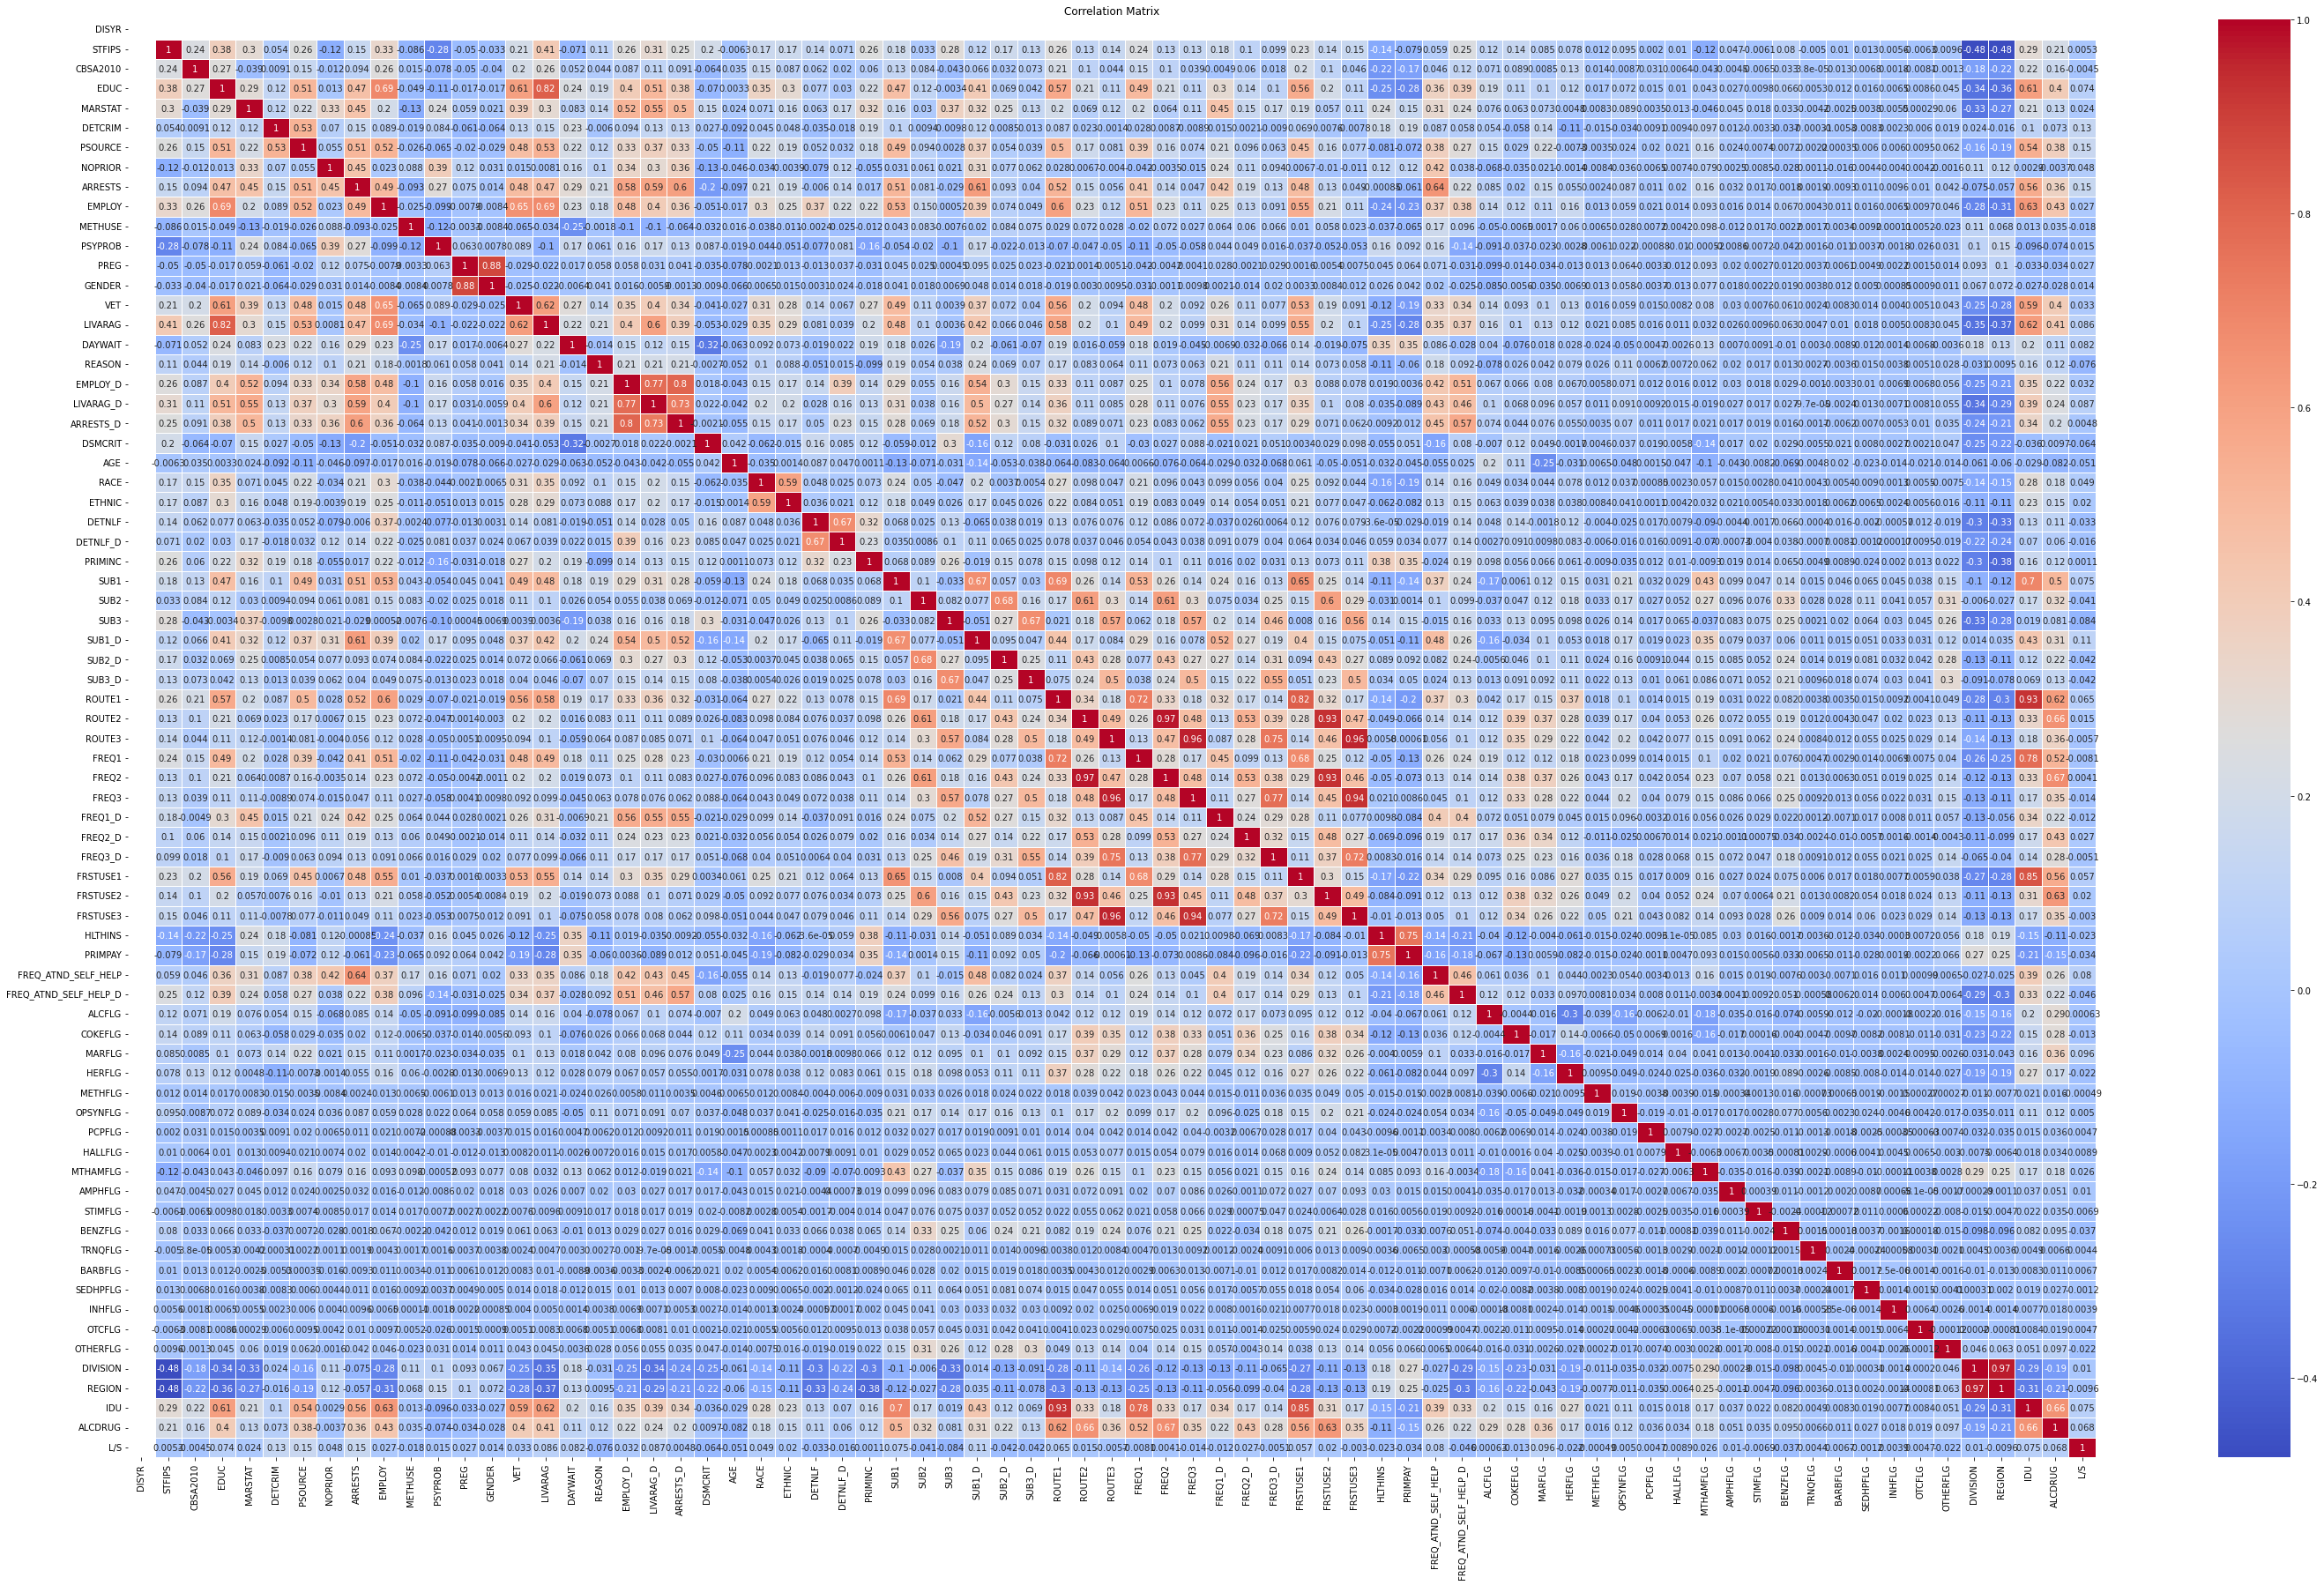

In [21]:
correlation_matrix = df.corr()
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Matrix')
plt.show()

In [22]:
correlation_threshold = 0.7
# Create a list to store the highly correlated feature pairs along with their coefficients.
highly_correlated_features = []

# Iterate through the correlation matrix and find highly correlated feature pairs.
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            coefficient = correlation_matrix.iloc[i, j]
            highly_correlated_features.append((feature1, feature2, coefficient))

# Print the list of highly correlated features along with their coefficients.
for feature1, feature2, coefficient in highly_correlated_features:
    print(f"Features: {feature1}, {feature2}, Coefficient: {coefficient}")

Features: GENDER, PREG, Coefficient: 0.8817794732467308
Features: LIVARAG, EDUC, Coefficient: 0.8193033260991083
Features: LIVARAG_D, EMPLOY_D, Coefficient: 0.7744473128557267
Features: ARRESTS_D, EMPLOY_D, Coefficient: 0.8030758876989945
Features: ARRESTS_D, LIVARAG_D, Coefficient: 0.7320521141905352
Features: FREQ1, ROUTE1, Coefficient: 0.723378731679254
Features: FREQ2, ROUTE2, Coefficient: 0.9715647523908071
Features: FREQ3, ROUTE3, Coefficient: 0.9611044701863183
Features: FREQ3_D, ROUTE3, Coefficient: 0.7462221607136725
Features: FREQ3_D, FREQ3, Coefficient: 0.7714543579304598
Features: FRSTUSE1, ROUTE1, Coefficient: 0.8151794190405008
Features: FRSTUSE2, ROUTE2, Coefficient: 0.9345372198720368
Features: FRSTUSE2, FREQ2, Coefficient: 0.9310095295696924
Features: FRSTUSE3, ROUTE3, Coefficient: 0.9566605130727798
Features: FRSTUSE3, FREQ3, Coefficient: 0.936087176024041
Features: FRSTUSE3, FREQ3_D, Coefficient: 0.7230481702787093
Features: PRIMPAY, HLTHINS, Coefficient: 0.751233919

In [23]:
## Drop less granular or less demo related columns
columns_to_drop = ["PREG", "LIVARAG","LIVARAG_D","ARRESTS_D","FREQ1","FREQ2","FREQ3","FREQ3_D","ROUTE1","ROUTE2","ROUTE3","HLTHINS","REGION","IDU"]
#PREG means pregnant or not. PREG is dropped, since gender is more demographic related
#LIVARAG categorize the living condition of an individual like homeless or indpendent living. LIVARAG is dropped, since EDUC is more demographic related and granular
#LIVARAG_D categorize the living condition of an individual like homeless or indpendent living at discharged. LIVARAG_D is dropped, since EMPLOY_D is more demographic related and granular
#ARRESTS_D: Arrests in past 30 days prior to discharge. This one is dropped, since EMPLOY_D is more demographic related
#ROUTE1: Route of administration (primary) FREQ1: Frequency of use at admission (primary). FREQ1 is dropped since it's less granular.
#FREQ2 is dropped, and this follows the same loggic above
#FREQ3 is dropped, and this follows the same loggic above
#FREQ3_D is dropped, and this follows the same loggic above
#FRSTUSE1: Age at first use (primary). ROUTE1 is droppeed, since FRSTUSE1 is more granular
#FRSTUSE2: Age at first use (primary). ROUTE2 is droppeed, since FRSTUSE2 is more granular
#FRSTUSE3: Age at first use (primary). ROUTE3 is droppeed, since FRSTUSE3 is more granular
#DIVISION: Census division REGION: Census region. REGION is less granular, so it's dropped
#PRIMPAY: Payment source, primary (expected or actual) HLTHINS: Health insurance. "HLTHINS" is dropped, since it's less granular
#IDU: Current IV drug use reported at admission. IDU is dropped since it's less granular than "FRSTUSE1"
df = df.drop(columns=columns_to_drop)

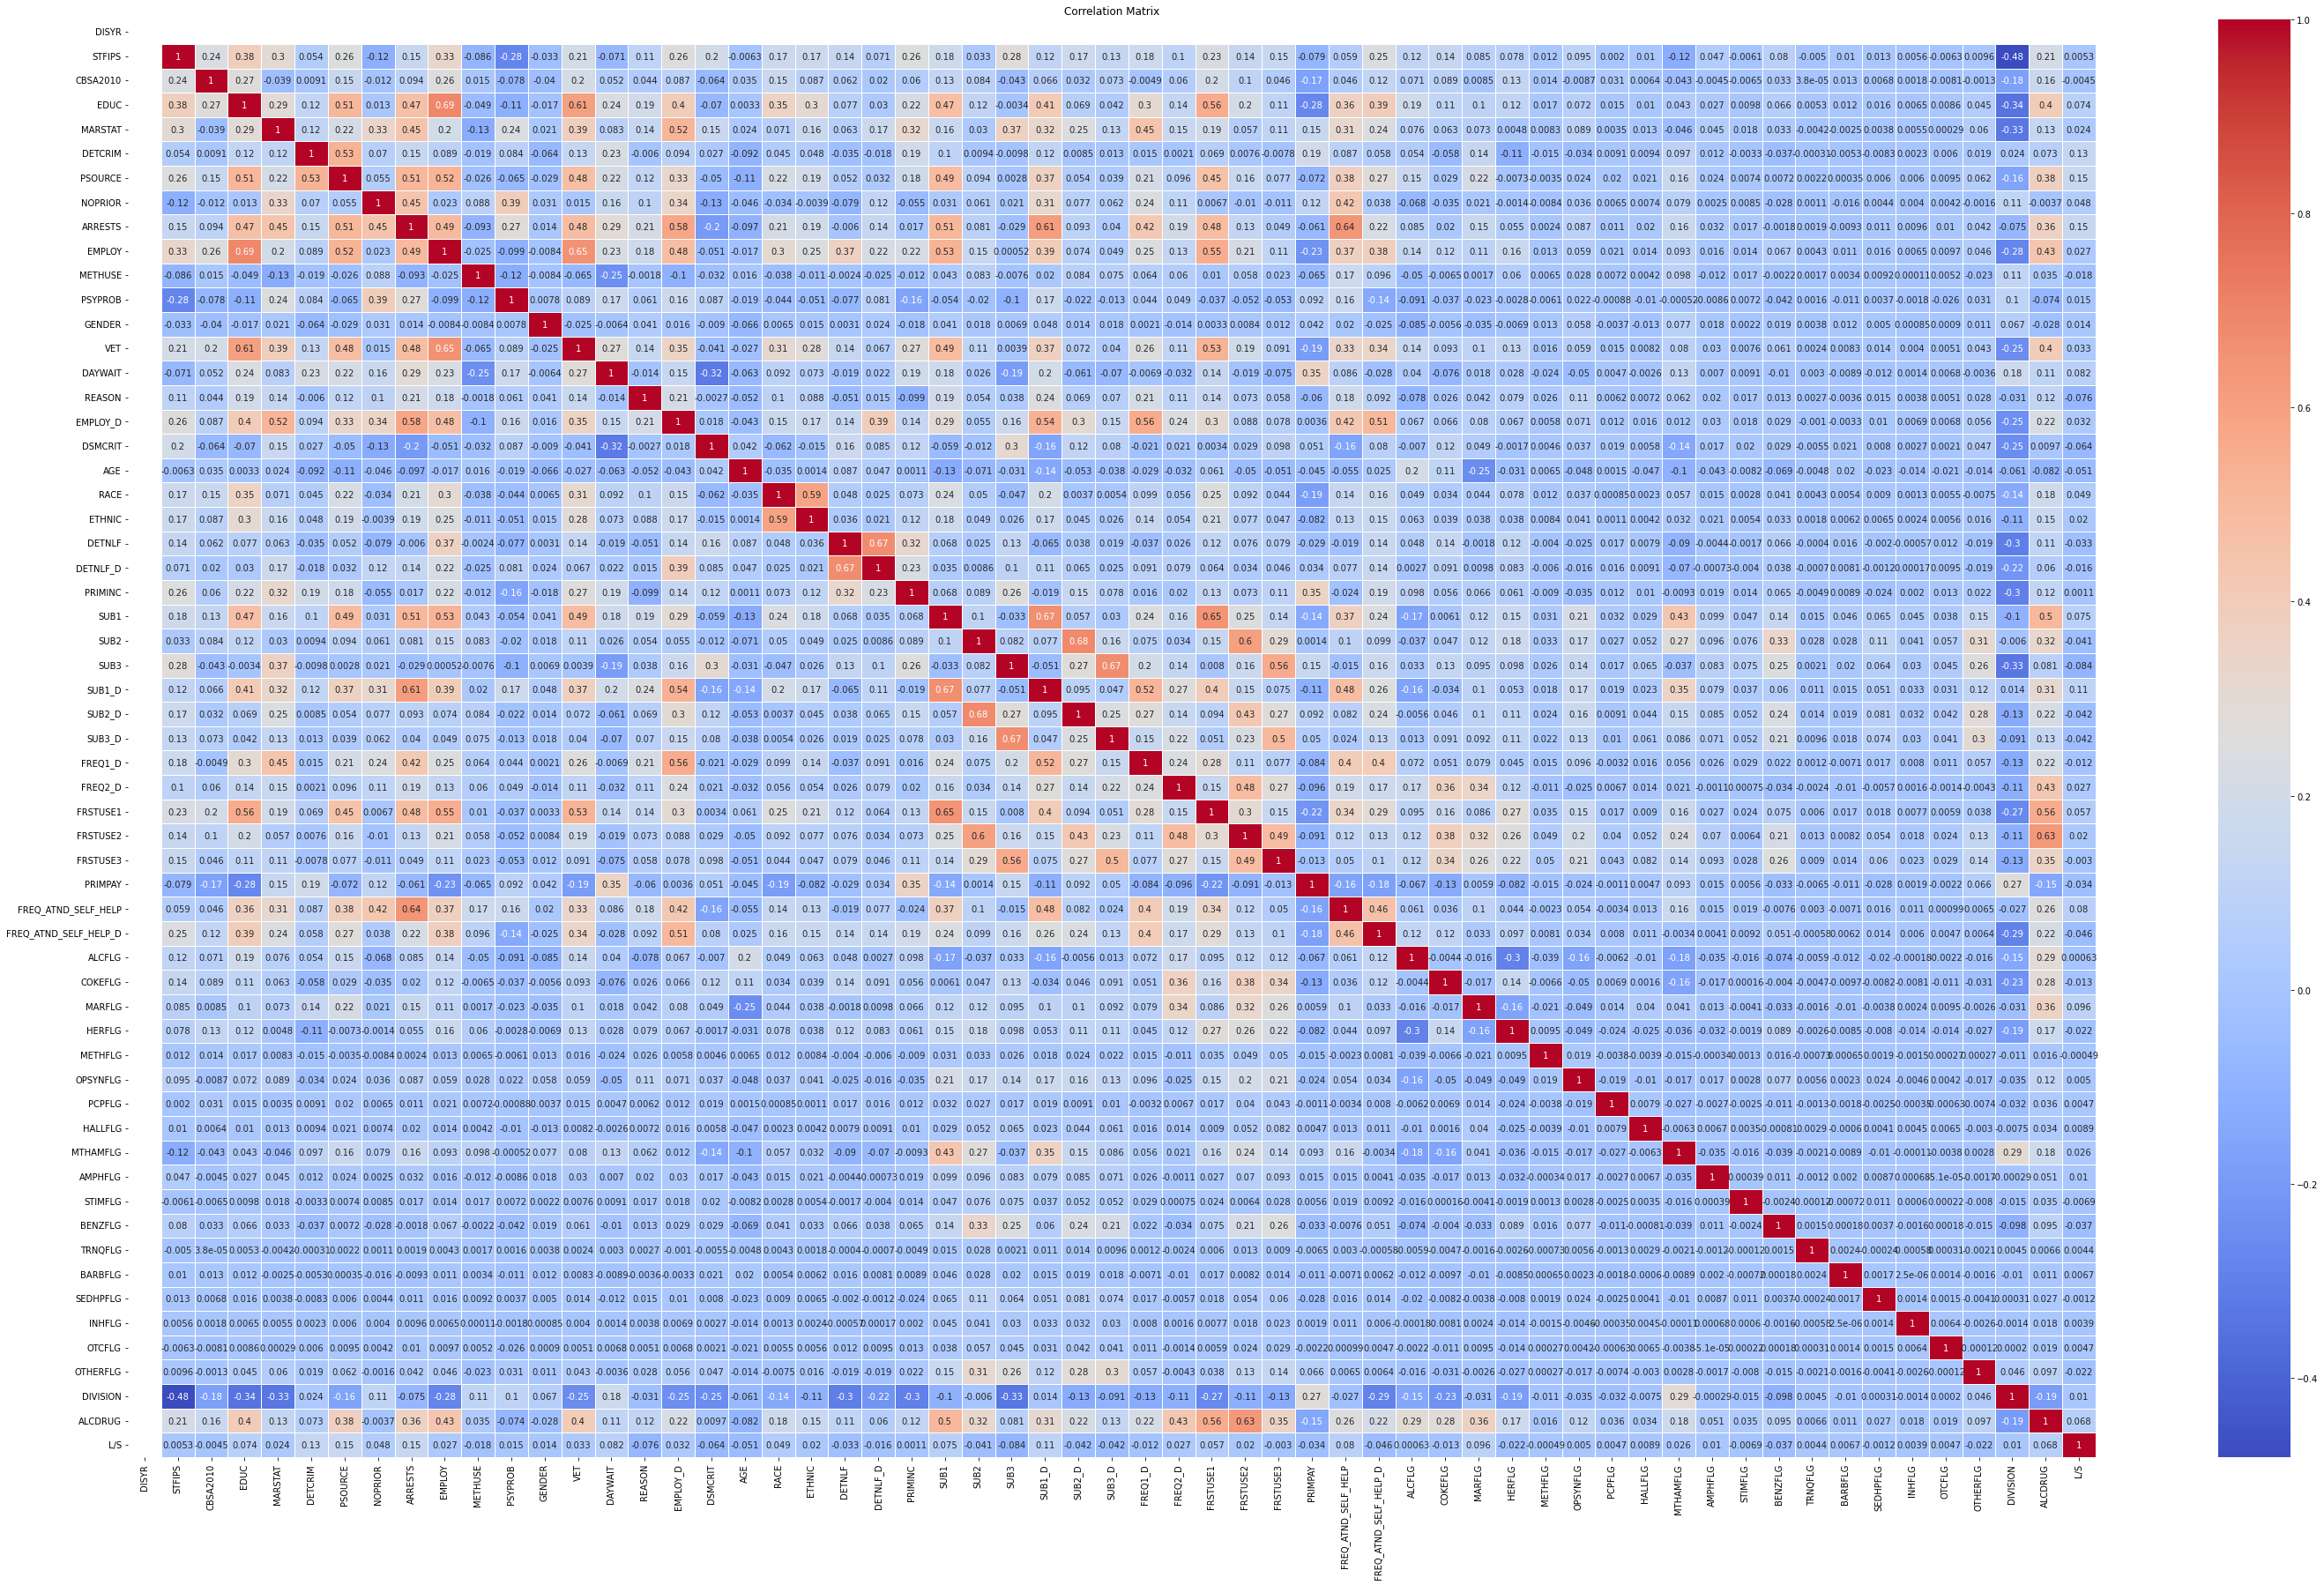

In [24]:
# Check correlation matrix again
correlation_matrix = df.corr()
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Matrix')
plt.show()

**Cirelli Notes 11-13-2023**
- Map -9 to null.
- Recompute null pct. per column.
- send pct by column via email.

In [25]:
df
# Check df again. 73 columns downsized to 59 columns, so 14 columns were dropped

DISYR  STFIPS  CBSA2010  EDUC  MARSTAT  DETCRIM  PSOURCE  NOPRIOR  \
0         2019       2        -9     4        1       -9        1        0   
1         2019       2        -9     3        1       -9        1        0   
2         2019       2        -9     2        1       -9        1        0   
3         2019       2        -9     3        1       -9        1        1   
4         2019       2        -9     3        3       -9        1        1   
...        ...     ...       ...   ...      ...      ...      ...      ...   
1722498   2019      56        -9     4        2       -9        1        0   
1722499   2019      56        -9     3        3        1        7        0   
1722500   2019      56        -9     2        1       -9        1        0   
1722501   2019      56        -9     1        1        3        7        0   
1722502   2019      56        -9    -9        4       -9        1        0   

         ARRESTS  EMPLOY  METHUSE  PSYPROB  GENDER  VET  DAYWAIT  REASON  \
0              0       2        2        1       2    2        0       1   
1              0       1        2        1       2    2        0       3   
2              0       4        2        1       2    2        0       3   
3              0       3        2        1       2    2        0       1   
4              0       4        2        1       2    2        0       3   
...          ...     ...      ...      ...     ...  ...      ...     ...   
1722498        0       1        2        2       1    2        1       2   
1722499        0       4        2        2       1    2        1       2   
1722500        0       3        2        1       2    2        2       4   
1722501        0       4        2        2       1    2        1       1   
1722502        0       1        2        2       1    2        1       2   

         EMPLOY_D  DSMCRIT  AGE  RACE  ETHNIC  DETNLF  DETNLF_D  PRIMINC  \
0               2       19    4     1       4      -9        -9        1   
1               1        4    5     1       4      -9        -9        1   
2               4       19    1     8       4       2         2        4   
3               3        4    5     1       4      -9        -9        4   
4               4        4   11     8       4       3         3        4   
...           ...      ...  ...   ...     ...     ...       ...      ...   
1722498         2        4   11     5       4      -9        -9        1   
1722499         4       10    8     2       1       3         3        3   
1722500         3        8    3     5       4      -9        -9        1   
1722501         4        7    2     5       4       4         4        2   
1722502         3        4   10     5       2      -9        -9        1   

         SUB1  SUB2  SUB3  SUB1_D  SUB2_D  SUB3_D  FREQ1_D  FREQ2_D  FRSTUSE1  \
0           2     1     1       2       1       1        2       -9         5   
1           2     4     1       2       4       1        2        2         3   
2           2     4     1       2       4       1        2        2         2   
3           2     5     4       2       5       4        1        3         3   
4           2     1     1       2       1       1        1       -9         7   
...       ...   ...   ...     ...     ...     ...      ...      ...       ...   
1722498     2     1     1       2       1       1        1       -9         3   
1722499     4     1     1       4       1       1        1       -9         4   
1722500    10     4     1      10       4       1        3        2         2   
1722501     4     2     9       4       2       9        1        2         3   
1722502     2     1     1       2       1       1        1       -9         3   

         FRSTUSE2  FRSTUSE3  PRIMPAY  FREQ_ATND_SELF_HELP  \
0              -9        -9        7                    1   
1               3        -9        7                    1   
2               2        -9        4                    1   
3               5         3  

In [26]:
X = df.drop(columns = ["L/S"]) #LOS_category
y = df["L/S"] # LOS_category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature Selection
### Chi Square

In [27]:
# # Chi2 selection
# selector = SelectKBest(chi2, k=X.shape[1])
# selector.fit(X_train, y_train)
# # selected features based on ChiSquare
# chi_scores = selector.scores_
# feature_names = X.columns

# # Save the table
# chi2table = pd.DataFrame({"Feature": feature_names,"Score":chi_scores})
# chi2table

In [28]:

# Set negative values in X_train to zero
X_train[X_train < 0] = 0

# Chi2 selection
selector = SelectKBest(chi2, k=X.shape[1])
selector.fit(X_train, y_train)
# selected features based on ChiSquare
chi_scores = selector.scores_
feature_names = X.columns

# Save the table
chi2table = pd.DataFrame({"Feature": feature_names, "Score": chi_scores})
chi2table




Feature         Score
0                   DISYR  1.930314e-23
1                  STFIPS  2.422808e+02
2                CBSA2010  2.698403e+05
3                    EDUC  1.496031e+03
4                 MARSTAT  3.727950e+02
5                 DETCRIM  6.805313e+04
6                 PSOURCE  7.504761e+04
7                 NOPRIOR  3.185335e+01
8                 ARRESTS  5.188222e+02
9                  EMPLOY  1.255023e+02
10                METHUSE  1.053487e+03
11                PSYPROB  2.857830e+02
12                 GENDER  5.308245e+01
13                    VET  2.403750e+02
14                DAYWAIT  1.422416e+04
15                 REASON  7.506525e+03
16               EMPLOY_D  1.221308e+03
17                DSMCRIT  3.724112e+03
18                    AGE  2.652334e+03
19                   RACE  9.469321e+02
20                 ETHNIC  7.944778e-01
21                 DETNLF  7.457068e+03
22               DETNLF_D  3.556400e+03
23                PRIMINC  2.064425e+03
24                   SUB1  5.634468e+03
25                   SUB2  1.053466e+03
26                   SUB3  4.240929e+03
27                 SUB1_D  1.079049e+04
28                 SUB2_D  2.114601e+02
29                 SUB3_D  1.110290e+03
30                FREQ1_D  1.412725e+04
31                FREQ2_D  1.002105e+03
32               FRSTUSE1  6.728410e+02
33               FRSTUSE2  3.847327e+01
34               FRSTUSE3  3.578636e+02
35                PRIMPAY  1.336973e+03
36    FREQ_ATND_SELF_HELP  1.003454e+04
37  FREQ_ATND_SELF_HELP_D  5.533806e+02
38                 ALCFLG  2.213645e-01
39                COKEFLG  1.474512e+02
40                 MARFLG  7.876566e+03
41                 HERFLG  4.264019e+02
42                METHFLG  5.123574e-01
43               OPSYNFLG  2.550757e+01
44                 PCPFLG  3.167587e+01
45                HALLFLG  1.009180e+02
46               MTHAMFLG  6.436279e+02
47                AMPHFLG  1.288459e+02
48                STIMFLG  5.124026e+01
49                BENZFLG  1.577576e+03
50                TRNQFLG  1.381524e+01
51                BARBFLG  5.755884e+01
52               SEDHPFLG  8.398062e-03
53                 INHFLG  1.037647e+01
54                 OTCFLG  2.954992e+01
55               OTHERFLG  5.647811e+02
56               DIVISION  1.950957e+02
57                ALCDRUG  2.156933e+03

**Notes**
- chi2 output column + score to csv.
- allow for modular threshold application.


**Note to Self**
- check if package exlcudes those features that don't mean p-value threshold.
- 


In [29]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Assuming X_train contains both numeric and encoded categorical variables
selector = SelectKBest(chi2, k=X_train.shape[1])
selector.fit(X_train, y_train)
chi_scores = selector.scores_

# Now you can create the table with feature names and scores
feature_names = X_train.columns
chi2table = pd.DataFrame({"Feature": feature_names, "Score": chi_scores})
print(chi2table)



                  Feature         Score
0                   DISYR  1.930314e-23
1                  STFIPS  2.422808e+02
2                CBSA2010  2.698403e+05
3                    EDUC  1.496031e+03
4                 MARSTAT  3.727950e+02
5                 DETCRIM  6.805313e+04
6                 PSOURCE  7.504761e+04
7                 NOPRIOR  3.185335e+01
8                 ARRESTS  5.188222e+02
9                  EMPLOY  1.255023e+02
10                METHUSE  1.053487e+03
11                PSYPROB  2.857830e+02
12                 GENDER  5.308245e+01
13                    VET  2.403750e+02
14                DAYWAIT  1.422416e+04
15                 REASON  7.506525e+03
16               EMPLOY_D  1.221308e+03
17                DSMCRIT  3.724112e+03
18                    AGE  2.652334e+03
19                   RACE  9.469321e+02
20                 ETHNIC  7.944778e-01
21                 DETNLF  7.457068e+03
22               DETNLF_D  3.556400e+03
23                PRIMINC  2.064425e+03


In [30]:
pd.set_option('display.max_rows', None)
chi2table.sort_values(by='Score', ascending=False)

Feature         Score
2                CBSA2010  2.698403e+05
6                 PSOURCE  7.504761e+04
5                 DETCRIM  6.805313e+04
14                DAYWAIT  1.422416e+04
30                FREQ1_D  1.412725e+04
27                 SUB1_D  1.079049e+04
36    FREQ_ATND_SELF_HELP  1.003454e+04
40                 MARFLG  7.876566e+03
15                 REASON  7.506525e+03
21                 DETNLF  7.457068e+03
24                   SUB1  5.634468e+03
26                   SUB3  4.240929e+03
17                DSMCRIT  3.724112e+03
22               DETNLF_D  3.556400e+03
18                    AGE  2.652334e+03
57                ALCDRUG  2.156933e+03
23                PRIMINC  2.064425e+03
49                BENZFLG  1.577576e+03
3                    EDUC  1.496031e+03
35                PRIMPAY  1.336973e+03
16               EMPLOY_D  1.221308e+03
29                 SUB3_D  1.110290e+03
10                METHUSE  1.053487e+03
25                   SUB2  1.053466e+03
31                FREQ2_D  1.002105e+03
19                   RACE  9.469321e+02
32               FRSTUSE1  6.728410e+02
46               MTHAMFLG  6.436279e+02
55               OTHERFLG  5.647811e+02
37  FREQ_ATND_SELF_HELP_D  5.533806e+02
8                 ARRESTS  5.188222e+02
41                 HERFLG  4.264019e+02
4                 MARSTAT  3.727950e+02
34               FRSTUSE3  3.578636e+02
11                PSYPROB  2.857830e+02
1                  STFIPS  2.422808e+02
13                    VET  2.403750e+02
28                 SUB2_D  2.114601e+02
56               DIVISION  1.950957e+02
39                COKEFLG  1.474512e+02
47                AMPHFLG  1.288459e+02
9                  EMPLOY  1.255023e+02
45                HALLFLG  1.009180e+02
51                BARBFLG  5.755884e+01
12                 GENDER  5.308245e+01
48                STIMFLG  5.124026e+01
33               FRSTUSE2  3.847327e+01
7                 NOPRIOR  3.185335e+01
44                 PCPFLG  3.167587e+01
54                 OTCFLG  2.954992e+01
43               OPSYNFLG  2.550757e+01
50                TRNQFLG  1.381524e+01
53                 INHFLG  1.037647e+01
20                 ETHNIC  7.944778e-01
42                METHFLG  5.123574e-01
38                 ALCFLG  2.213645e-01
52               SEDHPFLG  8.398062e-03
0                   DISYR  1.930314e-23

In [31]:
# Chi2 Score Stats
print("Mean important score: {}".format(chi2table["Score"].mean()))
print("Median important score: {}".format(chi2table["Score"].median()))
print("Stdev important score: {}".format(chi2table["Score"].std()))
print("Minimum important score: {}".format(chi2table["Score"].min()))
print("Maximum important score: {}".format(chi2table["Score"].max()))

Mean important score: 9067.556285341407
Median important score: 559.0808259943735
Stdev important score: 37277.882305604115
Minimum important score: 1.9303137751757398e-23
Maximum important score: 269840.2777842495


In [32]:
chi2table[chi2table["Score"]>=chi2table["Score"].median()].sort_values(by='Score', ascending=False)

Feature          Score
2              CBSA2010  269840.277784
6               PSOURCE   75047.605737
5               DETCRIM   68053.125588
14              DAYWAIT   14224.156834
30              FREQ1_D   14127.248201
27               SUB1_D   10790.486063
36  FREQ_ATND_SELF_HELP   10034.540160
40               MARFLG    7876.566190
15               REASON    7506.525063
21               DETNLF    7457.068296
24                 SUB1    5634.467814
26                 SUB3    4240.929306
17              DSMCRIT    3724.111769
22             DETNLF_D    3556.400326
18                  AGE    2652.333825
57              ALCDRUG    2156.932669
23              PRIMINC    2064.425267
49              BENZFLG    1577.576192
3                  EDUC    1496.031197
35              PRIMPAY    1336.973216
16             EMPLOY_D    1221.307972
29               SUB3_D    1110.290139
10              METHUSE    1053.486519
25                 SUB2    1053.465911
31              FREQ2_D    1002.105361
19                 RACE     946.932070
32             FRSTUSE1     672.841013
46             MTHAMFLG     643.627902
55             OTHERFLG     564.781083

In [33]:
# Imports
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [36]:
# Calculate PCA scores (explained variance ratios)
pca_scores = pca.explained_variance_ratio_

# Get the feature names
feature_names = X.columns

In [37]:
# Save the table
pca_table = pd.DataFrame({"Feature": feature_names, "Score": pca_scores})
pca_table

Feature         Score
0                   DISYR  1.387398e-01
1                  STFIPS  6.403873e-02
2                CBSA2010  5.203544e-02
3                    EDUC  4.614504e-02
4                 MARSTAT  3.681370e-02
5                 DETCRIM  3.226476e-02
6                 PSOURCE  3.066743e-02
7                 NOPRIOR  2.587420e-02
8                 ARRESTS  2.546536e-02
9                  EMPLOY  2.250149e-02
10                METHUSE  2.232514e-02
11                PSYPROB  2.077428e-02
12                 GENDER  2.023176e-02
13                    VET  1.953602e-02
14                DAYWAIT  1.878118e-02
15                 REASON  1.786463e-02
16               EMPLOY_D  1.776692e-02
17                DSMCRIT  1.762483e-02
18                    AGE  1.758548e-02
19                   RACE  1.754850e-02
20                 ETHNIC  1.745175e-02
21                 DETNLF  1.740511e-02
22               DETNLF_D  1.735220e-02
23                PRIMINC  1.730642e-02
24                   SUB1  1.720798e-02
25                   SUB2  1.665868e-02
26                   SUB3  1.654548e-02
27                 SUB1_D  1.539543e-02
28                 SUB2_D  1.466049e-02
29                 SUB3_D  1.455675e-02
30                FREQ1_D  1.305584e-02
31                FREQ2_D  1.272114e-02
32               FRSTUSE1  1.233137e-02
33               FRSTUSE2  1.125855e-02
34               FRSTUSE3  1.094186e-02
35                PRIMPAY  9.534729e-03
36    FREQ_ATND_SELF_HELP  9.134500e-03
37  FREQ_ATND_SELF_HELP_D  7.823330e-03
38                 ALCFLG  7.672751e-03
39                COKEFLG  7.452617e-03
40                 MARFLG  6.876718e-03
41                 HERFLG  6.718694e-03
42                METHFLG  6.038617e-03
43               OPSYNFLG  5.774615e-03
44                 PCPFLG  5.355257e-03
45                HALLFLG  5.204113e-03
46               MTHAMFLG  4.783437e-03
47                AMPHFLG  4.366894e-03
48                STIMFLG  4.077716e-03
49                BENZFLG  3.615591e-03
50                TRNQFLG  3.495461e-03
51                BARBFLG  3.074063e-03
52               SEDHPFLG  2.795245e-03
53                 INHFLG  2.624164e-03
54                 OTCFLG  2.256337e-03
55               OTHERFLG  1.372729e-03
56               DIVISION  5.187287e-04
57                ALCDRUG  6.877035e-34

In [38]:
pd.set_option('display.max_rows', None)
pca_table.sort_values(by='Score', ascending=False)

Feature         Score
0                   DISYR  1.387398e-01
1                  STFIPS  6.403873e-02
2                CBSA2010  5.203544e-02
3                    EDUC  4.614504e-02
4                 MARSTAT  3.681370e-02
5                 DETCRIM  3.226476e-02
6                 PSOURCE  3.066743e-02
7                 NOPRIOR  2.587420e-02
8                 ARRESTS  2.546536e-02
9                  EMPLOY  2.250149e-02
10                METHUSE  2.232514e-02
11                PSYPROB  2.077428e-02
12                 GENDER  2.023176e-02
13                    VET  1.953602e-02
14                DAYWAIT  1.878118e-02
15                 REASON  1.786463e-02
16               EMPLOY_D  1.776692e-02
17                DSMCRIT  1.762483e-02
18                    AGE  1.758548e-02
19                   RACE  1.754850e-02
20                 ETHNIC  1.745175e-02
21                 DETNLF  1.740511e-02
22               DETNLF_D  1.735220e-02
23                PRIMINC  1.730642e-02
24                   SUB1  1.720798e-02
25                   SUB2  1.665868e-02
26                   SUB3  1.654548e-02
27                 SUB1_D  1.539543e-02
28                 SUB2_D  1.466049e-02
29                 SUB3_D  1.455675e-02
30                FREQ1_D  1.305584e-02
31                FREQ2_D  1.272114e-02
32               FRSTUSE1  1.233137e-02
33               FRSTUSE2  1.125855e-02
34               FRSTUSE3  1.094186e-02
35                PRIMPAY  9.534729e-03
36    FREQ_ATND_SELF_HELP  9.134500e-03
37  FREQ_ATND_SELF_HELP_D  7.823330e-03
38                 ALCFLG  7.672751e-03
39                COKEFLG  7.452617e-03
40                 MARFLG  6.876718e-03
41                 HERFLG  6.718694e-03
42                METHFLG  6.038617e-03
43               OPSYNFLG  5.774615e-03
44                 PCPFLG  5.355257e-03
45                HALLFLG  5.204113e-03
46               MTHAMFLG  4.783437e-03
47                AMPHFLG  4.366894e-03
48                STIMFLG  4.077716e-03
49                BENZFLG  3.615591e-03
50                TRNQFLG  3.495461e-03
51                BARBFLG  3.074063e-03
52               SEDHPFLG  2.795245e-03
53                 INHFLG  2.624164e-03
54                 OTCFLG  2.256337e-03
55               OTHERFLG  1.372729e-03
56               DIVISION  5.187287e-04
57                ALCDRUG  6.877035e-34

In [39]:
# PCA Score Stats
print("Mean important score: {}".format(pca_table["Score"].mean()))
print("Median important score: {}".format(pca_table["Score"].median()))
print("Stdev important score: {}".format(pca_table["Score"].std()))
print("Minimum important score: {}".format(pca_table["Score"].min()))
print("Maximum important score: {}".format(pca_table["Score"].max()))

Mean important score: 0.017241379310344827
Median important score: 0.014608624649835984
Stdev important score: 0.020466539510245338
Minimum important score: 6.877035199755722e-34
Maximum important score: 0.1387397577102791


In [ ]:
**Notes**
- 4 feature selection approaches.
- XGBoost, RandomForest, Chi2, Lasso.
- fit all features, get feature importance.
- For each test & score, calculate the median score & use this as the threshold.  See how many features above threshold.
- Note: include all scores in table & median.

In [40]:
pca_table[pca_table["Score"] >= pca_table["Score"].median()].sort_values(by='Score', ascending=False)

Feature     Score
0      DISYR  0.138740
1     STFIPS  0.064039
2   CBSA2010  0.052035
3       EDUC  0.046145
4    MARSTAT  0.036814
5    DETCRIM  0.032265
6    PSOURCE  0.030667
7    NOPRIOR  0.025874
8    ARRESTS  0.025465
9     EMPLOY  0.022501
10   METHUSE  0.022325
11   PSYPROB  0.020774
12    GENDER  0.020232
13       VET  0.019536
14   DAYWAIT  0.018781
15    REASON  0.017865
16  EMPLOY_D  0.017767
17   DSMCRIT  0.017625
18       AGE  0.017585
19      RACE  0.017549
20    ETHNIC  0.017452
21    DETNLF  0.017405
22  DETNLF_D  0.017352
23   PRIMINC  0.017306
24      SUB1  0.017208
25      SUB2  0.016659
26      SUB3  0.016545
27    SUB1_D  0.015395
28    SUB2_D  0.014660

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import xgboost as xgb

In [42]:
# Create and fit an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
# Get feature importances from the XGBoost model
xgb_feature_importances = xgb_model.feature_importances_

In [44]:
# Create a DataFrame to store feature names and their XGBoost scores
feature_names = X.columns
xgb_table = pd.DataFrame({"Feature": feature_names, "XGBoost_Score": xgb_feature_importances})

In [45]:
# Display the XGBoost feature importance table
pd.set_option('display.max_rows', None)
xgb_table.sort_values(by='XGBoost_Score', ascending=False)

Feature  XGBoost_Score
27                 SUB1_D       0.066924
30                FREQ1_D       0.063691
40                 MARFLG       0.054336
56               DIVISION       0.048541
6                 PSOURCE       0.047920
16               EMPLOY_D       0.046829
15                 REASON       0.046706
10                METHUSE       0.045357
9                  EMPLOY       0.038059
1                  STFIPS       0.037308
36    FREQ_ATND_SELF_HELP       0.036257
22               DETNLF_D       0.033289
11                PSYPROB       0.027735
37  FREQ_ATND_SELF_HELP_D       0.027515
26                   SUB3       0.021483
23                PRIMINC       0.020345
25                   SUB2       0.019967
31                FREQ2_D       0.018728
17                DSMCRIT       0.018549
14                DAYWAIT       0.016842
4                 MARSTAT       0.015695
28                 SUB2_D       0.014863
35                PRIMPAY       0.014173
2                CBSA2010       0.013179
21                 DETNLF       0.013049
51                BARBFLG       0.012712
49                BENZFLG       0.012353
24                   SUB1       0.011997
46               MTHAMFLG       0.011945
41                 HERFLG       0.011664
5                 DETCRIM       0.010904
43               OPSYNFLG       0.009995
7                 NOPRIOR       0.009519
12                 GENDER       0.009223
3                    EDUC       0.008846
18                    AGE       0.008489
29                 SUB3_D       0.008346
13                    VET       0.007097
57                ALCDRUG       0.005551
54                 OTCFLG       0.005479
39                COKEFLG       0.004697
42                METHFLG       0.004554
8                 ARRESTS       0.004459
20                 ETHNIC       0.003861
19                   RACE       0.003587
55               OTHERFLG       0.002952
32               FRSTUSE1       0.002903
33               FRSTUSE2       0.002830
47                AMPHFLG       0.002812
38                 ALCFLG       0.002777
45                HALLFLG       0.002418
52               SEDHPFLG       0.002221
44                 PCPFLG       0.002216
34               FRSTUSE3       0.002058
48                STIMFLG       0.001642
53                 INHFLG       0.001413
50                TRNQFLG       0.001139
0                   DISYR       0.000000

In [46]:
# XGBoost Score Stats
print("Mean XGBoost important score: {}".format(xgb_table["XGBoost_Score"].mean()))
print("Median XGBoost important score: {}".format(xgb_table["XGBoost_Score"].median()))
print("Stdev XGBoost important score: {}".format(xgb_table["XGBoost_Score"].std()))
print("Minimum XGBoost important score: {}".format(xgb_table["XGBoost_Score"].min()))
print("Maximum XGBoost important score: {}".format(xgb_table["XGBoost_Score"].max()))


Mean XGBoost important score: 0.017241379246115685
Median XGBoost important score: 0.011804236099123955
Stdev XGBoost important score: 0.01727195270359516
Minimum XGBoost important score: 0.0
Maximum XGBoost important score: 0.06692375987768173


In [47]:
# Filter and display features with scores above or equal to the median
xgb_table[xgb_table["XGBoost_Score"] >= xgb_table["XGBoost_Score"].median()].sort_values(by='XGBoost_Score', ascending=False)

Feature  XGBoost_Score
27                 SUB1_D       0.066924
30                FREQ1_D       0.063691
40                 MARFLG       0.054336
56               DIVISION       0.048541
6                 PSOURCE       0.047920
16               EMPLOY_D       0.046829
15                 REASON       0.046706
10                METHUSE       0.045357
9                  EMPLOY       0.038059
1                  STFIPS       0.037308
36    FREQ_ATND_SELF_HELP       0.036257
22               DETNLF_D       0.033289
11                PSYPROB       0.027735
37  FREQ_ATND_SELF_HELP_D       0.027515
26                   SUB3       0.021483
23                PRIMINC       0.020345
25                   SUB2       0.019967
31                FREQ2_D       0.018728
17                DSMCRIT       0.018549
14                DAYWAIT       0.016842
4                 MARSTAT       0.015695
28                 SUB2_D       0.014863
35                PRIMPAY       0.014173
2                CBSA2010       0.013179
21                 DETNLF       0.013049
51                BARBFLG       0.012712
49                BENZFLG       0.012353
24                   SUB1       0.011997
46               MTHAMFLG       0.011945

In [48]:
# Logistic Regression with L1 regularization - Lasso 
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver="liblinear"), max_features=X.shape[1])
embeded_lr_selector.fit(X, y)

# selected features based on Lasso
lasso_scores = embeded_lr_selector.estimator_.coef_
feature_names = X.columns
lassotable = pd.DataFrame({"Feature": feature_names,"Score":lasso_scores[0]})
lassotable

Feature     Score
0                   DISYR -0.000072
1                  STFIPS -0.002010
2                CBSA2010 -0.000002
3                    EDUC  0.021233
4                 MARSTAT  0.021855
5                 DETCRIM  0.030398
6                 PSOURCE  0.047301
7                 NOPRIOR  0.000016
8                 ARRESTS  0.158575
9                  EMPLOY -0.055108
10                METHUSE  0.008950
11                PSYPROB -0.039157
12                 GENDER  0.109630
13                    VET -0.047794
14                DAYWAIT  0.022579
15                 REASON -0.156185
16               EMPLOY_D  0.009524
17                DSMCRIT  0.004325
18                    AGE -0.004464
19                   RACE  0.024376
20                 ETHNIC -0.014152
21                 DETNLF  0.008263
22               DETNLF_D -0.012276
23                PRIMINC  0.011449
24                   SUB1 -0.070983
25                   SUB2 -0.086178
26                   SUB3 -0.074592
27                 SUB1_D  0.035178
28                 SUB2_D  0.019684
29                 SUB3_D  0.010615
30                FREQ1_D -0.028635
31                FREQ2_D -0.012309
32               FRSTUSE1 -0.004706
33               FRSTUSE2  0.011551
34               FRSTUSE3  0.015112
35                PRIMPAY -0.027139
36    FREQ_ATND_SELF_HELP  0.019903
37  FREQ_ATND_SELF_HELP_D -0.039355
38                 ALCFLG -0.094259
39                COKEFLG  0.026913
40                 MARFLG  0.383137
41                 HERFLG  0.219777
42                METHFLG  0.391889
43               OPSYNFLG  0.352621
44                 PCPFLG  0.342024
45                HALLFLG  0.508603
46               MTHAMFLG  0.269697
47                AMPHFLG  0.521824
48                STIMFLG  0.444747
49                BENZFLG  0.299179
50                TRNQFLG  1.049991
51                BARBFLG  1.298901
52               SEDHPFLG  0.749212
53                 INHFLG  0.990148
54                 OTCFLG  0.939540
55               OTHERFLG  0.666303
56               DIVISION -0.032159
57                ALCDRUG  0.093493

In [49]:
abs_lasso_scores = abs(lasso_scores).tolist()[0]
feature_names = X.columns
lassotable = pd.DataFrame({"Feature": feature_names,"Score":abs_lasso_scores})
lassotable

Feature     Score
0                   DISYR  0.000072
1                  STFIPS  0.002010
2                CBSA2010  0.000002
3                    EDUC  0.021233
4                 MARSTAT  0.021855
5                 DETCRIM  0.030398
6                 PSOURCE  0.047301
7                 NOPRIOR  0.000016
8                 ARRESTS  0.158575
9                  EMPLOY  0.055108
10                METHUSE  0.008950
11                PSYPROB  0.039157
12                 GENDER  0.109630
13                    VET  0.047794
14                DAYWAIT  0.022579
15                 REASON  0.156185
16               EMPLOY_D  0.009524
17                DSMCRIT  0.004325
18                    AGE  0.004464
19                   RACE  0.024376
20                 ETHNIC  0.014152
21                 DETNLF  0.008263
22               DETNLF_D  0.012276
23                PRIMINC  0.011449
24                   SUB1  0.070983
25                   SUB2  0.086178
26                   SUB3  0.074592
27                 SUB1_D  0.035178
28                 SUB2_D  0.019684
29                 SUB3_D  0.010615
30                FREQ1_D  0.028635
31                FREQ2_D  0.012309
32               FRSTUSE1  0.004706
33               FRSTUSE2  0.011551
34               FRSTUSE3  0.015112
35                PRIMPAY  0.027139
36    FREQ_ATND_SELF_HELP  0.019903
37  FREQ_ATND_SELF_HELP_D  0.039355
38                 ALCFLG  0.094259
39                COKEFLG  0.026913
40                 MARFLG  0.383137
41                 HERFLG  0.219777
42                METHFLG  0.391889
43               OPSYNFLG  0.352621
44                 PCPFLG  0.342024
45                HALLFLG  0.508603
46               MTHAMFLG  0.269697
47                AMPHFLG  0.521824
48                STIMFLG  0.444747
49                BENZFLG  0.299179
50                TRNQFLG  1.049991
51                BARBFLG  1.298901
52               SEDHPFLG  0.749212
53                 INHFLG  0.990148
54                 OTCFLG  0.939540
55               OTHERFLG  0.666303
56               DIVISION  0.032159
57                ALCDRUG  0.093493

In [50]:
pd.set_option('display.max_rows', None)
lassotable.sort_values(by='Score', ascending=False)

Feature     Score
51                BARBFLG  1.298901
50                TRNQFLG  1.049991
53                 INHFLG  0.990148
54                 OTCFLG  0.939540
52               SEDHPFLG  0.749212
55               OTHERFLG  0.666303
47                AMPHFLG  0.521824
45                HALLFLG  0.508603
48                STIMFLG  0.444747
42                METHFLG  0.391889
40                 MARFLG  0.383137
43               OPSYNFLG  0.352621
44                 PCPFLG  0.342024
49                BENZFLG  0.299179
46               MTHAMFLG  0.269697
41                 HERFLG  0.219777
8                 ARRESTS  0.158575
15                 REASON  0.156185
12                 GENDER  0.109630
38                 ALCFLG  0.094259
57                ALCDRUG  0.093493
25                   SUB2  0.086178
26                   SUB3  0.074592
24                   SUB1  0.070983
9                  EMPLOY  0.055108
13                    VET  0.047794
6                 PSOURCE  0.047301
37  FREQ_ATND_SELF_HELP_D  0.039355
11                PSYPROB  0.039157
27                 SUB1_D  0.035178
56               DIVISION  0.032159
5                 DETCRIM  0.030398
30                FREQ1_D  0.028635
35                PRIMPAY  0.027139
39                COKEFLG  0.026913
19                   RACE  0.024376
14                DAYWAIT  0.022579
4                 MARSTAT  0.021855
3                    EDUC  0.021233
36    FREQ_ATND_SELF_HELP  0.019903
28                 SUB2_D  0.019684
34               FRSTUSE3  0.015112
20                 ETHNIC  0.014152
31                FREQ2_D  0.012309
22               DETNLF_D  0.012276
33               FRSTUSE2  0.011551
23                PRIMINC  0.011449
29                 SUB3_D  0.010615
16               EMPLOY_D  0.009524
10                METHUSE  0.008950
21                 DETNLF  0.008263
32               FRSTUSE1  0.004706
18                    AGE  0.004464
17                DSMCRIT  0.004325
1                  STFIPS  0.002010
0                   DISYR  0.000072
7                 NOPRIOR  0.000016
2                CBSA2010  0.000002

In [51]:
# Lasso Score Stats
print("Mean important score: {}".format(lassotable["Score"].mean()))
print("Median important score: {}".format(lassotable["Score"].median()))
print("Stdev important score: {}".format(lassotable["Score"].std()))
print("Minimum important score: {}".format(lassotable["Score"].min()))
print("Maximum important score: {}".format(lassotable["Score"].max()))

Mean important score: 0.1886216123771081
Median important score: 0.03716749657392018
Stdev important score: 0.3018387800160901
Minimum important score: 2.4862725188963145e-06
Maximum important score: 1.298901414825796


In [52]:
# Decision Tree

# Train a decision tree classifier on all features
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
feature_importances = dtc.feature_importances_

In [53]:
feature_importances

array([0.00000000e+00, 5.54413645e-02, 4.59367257e-02, 3.42730028e-02,
       2.16705851e-02, 9.44891507e-03, 4.62546004e-02, 1.23583664e-02,
       9.02244175e-03, 2.13375726e-02, 1.68911431e-02, 1.75552956e-02,
       1.55471876e-02, 6.33409593e-03, 1.56209694e-02, 5.14117809e-02,
       2.26525339e-02, 3.90741357e-02, 5.97415178e-02, 2.32757328e-02,
       1.44454451e-02, 1.01905004e-02, 1.18927806e-02, 2.37490931e-02,
       1.41768168e-02, 1.66386223e-02, 1.03939979e-02, 3.39866007e-02,
       1.72391265e-02, 1.17244368e-02, 4.41343108e-02, 8.59502946e-03,
       4.36089170e-02, 2.65161928e-02, 1.12331644e-02, 1.85003745e-02,
       2.93274492e-02, 3.63763780e-02, 4.62721109e-03, 5.91146676e-03,
       7.39841861e-03, 5.14501455e-03, 4.77530084e-04, 5.03777692e-03,
       7.01953439e-04, 8.21343321e-04, 4.43347359e-03, 1.34481467e-03,
       6.41108094e-04, 2.03337835e-03, 3.91786123e-05, 3.34743732e-04,
       4.12586861e-04, 9.26061083e-05, 1.44714795e-04, 1.04537893e-03,
      

In [54]:
feature_names = X.columns
treetable = pd.DataFrame({"Feature": feature_names,"Score":feature_importances.tolist()})
treetable

Feature     Score
0                   DISYR  0.000000
1                  STFIPS  0.055441
2                CBSA2010  0.045937
3                    EDUC  0.034273
4                 MARSTAT  0.021671
5                 DETCRIM  0.009449
6                 PSOURCE  0.046255
7                 NOPRIOR  0.012358
8                 ARRESTS  0.009022
9                  EMPLOY  0.021338
10                METHUSE  0.016891
11                PSYPROB  0.017555
12                 GENDER  0.015547
13                    VET  0.006334
14                DAYWAIT  0.015621
15                 REASON  0.051412
16               EMPLOY_D  0.022653
17                DSMCRIT  0.039074
18                    AGE  0.059742
19                   RACE  0.023276
20                 ETHNIC  0.014445
21                 DETNLF  0.010191
22               DETNLF_D  0.011893
23                PRIMINC  0.023749
24                   SUB1  0.014177
25                   SUB2  0.016639
26                   SUB3  0.010394
27                 SUB1_D  0.033987
28                 SUB2_D  0.017239
29                 SUB3_D  0.011724
30                FREQ1_D  0.044134
31                FREQ2_D  0.008595
32               FRSTUSE1  0.043609
33               FRSTUSE2  0.026516
34               FRSTUSE3  0.011233
35                PRIMPAY  0.018500
36    FREQ_ATND_SELF_HELP  0.029327
37  FREQ_ATND_SELF_HELP_D  0.036376
38                 ALCFLG  0.004627
39                COKEFLG  0.005911
40                 MARFLG  0.007398
41                 HERFLG  0.005145
42                METHFLG  0.000478
43               OPSYNFLG  0.005038
44                 PCPFLG  0.000702
45                HALLFLG  0.000821
46               MTHAMFLG  0.004433
47                AMPHFLG  0.001345
48                STIMFLG  0.000641
49                BENZFLG  0.002033
50                TRNQFLG  0.000039
51                BARBFLG  0.000335
52               SEDHPFLG  0.000413
53                 INHFLG  0.000093
54                 OTCFLG  0.000145
55               OTHERFLG  0.001045
56               DIVISION  0.044705
57                ALCDRUG  0.008075

In [55]:
pd.set_option('display.max_rows', None)
treetable.sort_values(by='Score', ascending=False)

Feature     Score
18                    AGE  0.059742
1                  STFIPS  0.055441
15                 REASON  0.051412
6                 PSOURCE  0.046255
2                CBSA2010  0.045937
56               DIVISION  0.044705
30                FREQ1_D  0.044134
32               FRSTUSE1  0.043609
17                DSMCRIT  0.039074
37  FREQ_ATND_SELF_HELP_D  0.036376
3                    EDUC  0.034273
27                 SUB1_D  0.033987
36    FREQ_ATND_SELF_HELP  0.029327
33               FRSTUSE2  0.026516
23                PRIMINC  0.023749
19                   RACE  0.023276
16               EMPLOY_D  0.022653
4                 MARSTAT  0.021671
9                  EMPLOY  0.021338
35                PRIMPAY  0.018500
11                PSYPROB  0.017555
28                 SUB2_D  0.017239
10                METHUSE  0.016891
25                   SUB2  0.016639
14                DAYWAIT  0.015621
12                 GENDER  0.015547
20                 ETHNIC  0.014445
24                   SUB1  0.014177
7                 NOPRIOR  0.012358
22               DETNLF_D  0.011893
29                 SUB3_D  0.011724
34               FRSTUSE3  0.011233
26                   SUB3  0.010394
21                 DETNLF  0.010191
5                 DETCRIM  0.009449
8                 ARRESTS  0.009022
31                FREQ2_D  0.008595
57                ALCDRUG  0.008075
40                 MARFLG  0.007398
13                    VET  0.006334
39                COKEFLG  0.005911
41                 HERFLG  0.005145
43               OPSYNFLG  0.005038
38                 ALCFLG  0.004627
46               MTHAMFLG  0.004433
49                BENZFLG  0.002033
47                AMPHFLG  0.001345
55               OTHERFLG  0.001045
45                HALLFLG  0.000821
44                 PCPFLG  0.000702
48                STIMFLG  0.000641
42                METHFLG  0.000478
52               SEDHPFLG  0.000413
51                BARBFLG  0.000335
54                 OTCFLG  0.000145
53                 INHFLG  0.000093
50                TRNQFLG  0.000039
0                   DISYR  0.000000

In [56]:
# Decision Tree Score Stats
print("Mean important score: {}".format(treetable["Score"].mean()))
print("Median important score: {}".format(treetable["Score"].median()))
print("Stdev important score: {}".format(treetable["Score"].std()))
print("Minimum important score: {}".format(treetable["Score"].min()))
print("Maximum important score: {}".format(treetable["Score"].max()))

Mean important score: 0.017241379310344827
Median important score: 0.012125573527505446
Stdev important score: 0.016300714190181653
Minimum important score: 0.0
Maximum important score: 0.0597415178265024


In [57]:
# RF
# instantiate Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model to the data
rfc.fit(X_train, y_train)
# extract the feature importances
importances = rfc.feature_importances_

In [58]:
feature_names = X.columns
rftable = pd.DataFrame({"Feature": feature_names,"Score":importances.tolist()})
rftable

Feature     Score
0                   DISYR  0.000000
1                  STFIPS  0.040243
2                CBSA2010  0.045594
3                    EDUC  0.034954
4                 MARSTAT  0.025249
5                 DETCRIM  0.016392
6                 PSOURCE  0.036514
7                 NOPRIOR  0.014411
8                 ARRESTS  0.008587
9                  EMPLOY  0.023095
10                METHUSE  0.018715
11                PSYPROB  0.020450
12                 GENDER  0.016266
13                    VET  0.007037
14                DAYWAIT  0.014828
15                 REASON  0.052588
16               EMPLOY_D  0.028388
17                DSMCRIT  0.035014
18                    AGE  0.054700
19                   RACE  0.024058
20                 ETHNIC  0.014597
21                 DETNLF  0.011864
22               DETNLF_D  0.012179
23                PRIMINC  0.024179
24                   SUB1  0.019757
25                   SUB2  0.020815
26                   SUB3  0.016372
27                 SUB1_D  0.028182
28                 SUB2_D  0.020851
29                 SUB3_D  0.014124
30                FREQ1_D  0.037551
31                FREQ2_D  0.009993
32               FRSTUSE1  0.042392
33               FRSTUSE2  0.024900
34               FRSTUSE3  0.011391
35                PRIMPAY  0.022021
36    FREQ_ATND_SELF_HELP  0.031653
37  FREQ_ATND_SELF_HELP_D  0.032939
38                 ALCFLG  0.006244
39                COKEFLG  0.006127
40                 MARFLG  0.008122
41                 HERFLG  0.006167
42                METHFLG  0.000468
43               OPSYNFLG  0.005251
44                 PCPFLG  0.000683
45                HALLFLG  0.000710
46               MTHAMFLG  0.005536
47                AMPHFLG  0.001455
48                STIMFLG  0.000656
49                BENZFLG  0.002676
50                TRNQFLG  0.000049
51                BARBFLG  0.000210
52               SEDHPFLG  0.000495
53                 INHFLG  0.000153
54                 OTCFLG  0.000212
55               OTHERFLG  0.001692
56               DIVISION  0.030963
57                ALCDRUG  0.009290

In [59]:
# RF Score Stats
print("Mean important score: {}".format(rftable["Score"].mean()))
print("Median important score: {}".format(rftable["Score"].median()))
print("Stdev important score: {}".format(rftable["Score"].std()))
print("Minimum important score: {}".format(rftable["Score"].min()))
print("Maximum important score: {}".format(rftable["Score"].max()))

Mean important score: 0.017241379310344824
Median important score: 0.014712440499708934
Stdev important score: 0.01447143339606656
Minimum important score: 0.0
Maximum important score: 0.05470032250092824


In [60]:
# merged_table = pd.merge(chi2table,lassotable, on = "Feature", suffixes=('_Chi2', '_Lasso'))
# merged_table = pd.merge(merged_table,treetable, on = "Feature")
# merged_table = pd.merge(merged_table,rftable, on = "Feature",suffixes=('_Tree', '_RF'))
# merged_table = pd.merge(merged_table,pca_table, on = "Feature"), suffixes=('_PCA'))
# merged_table = pd.merge(merged_table,xgb_table, on = "Feature"), suffixes=('_XGBoost'))
# merged_table["Rank_Chi2"] = merged_table["Score_Chi2"].rank(ascending = False)
# merged_table["Rank_Lasso"] = merged_table["Score_Lasso"].rank(ascending = False)
# merged_table["Rank_Tree"] = merged_table["Score_Tree"].rank(ascending = False)
# merged_table["Rank_RF"] = merged_table["Score_RF"].rank(ascending = False)
# merged_table["Rank_PCA"] = merged_table["Score_PCA"].rank(ascending = False)
# merged_table["Rank_XGBoost"] = merged_table["Score_XGBoost"].rank(ascending = False)
# merged_table["Rank_Total"] = merged_table["Rank_Chi2"]+merged_table["Rank_Lasso"]+merged_table["Rank_Tree"]+merged_table["Rank_RF"]+merged_table["Rank_PCA"]+merged_table["Rank_XGBoost"]

merged_table = pd.merge(chi2table, lassotable, on="Feature", suffixes=('_Chi2', '_Lasso'))
merged_table = pd.merge(merged_table, treetable, on="Feature")
merged_table = pd.merge(merged_table, rftable, on="Feature", suffixes=('_Tree', '_RF'))
merged_table = pd.merge(merged_table, pca_table, on="Feature", suffixes=('_PCA'))
merged_table = pd.merge(merged_table, xgb_table, on="Feature", suffixes=('_XGBoost'))

merged_table["Rank_Chi2"] = merged_table["Score_Chi2"].rank(ascending=False)
merged_table["Rank_Lasso"] = merged_table["Score_Lasso"].rank(ascending=False)
merged_table["Rank_Tree"] = merged_table["Score_Tree"].rank(ascending=False)
merged_table["Rank_RF"] = merged_table["Score_RF"].rank(ascending=False)
merged_table["Rank_PCA"] = merged_table["Score"].rank(ascending=False)
merged_table["Rank_XGBoost"] = merged_table["XGBoost_Score"].rank(ascending=False)
merged_table["Rank_Total"] = (merged_table["Rank_Chi2"] + merged_table["Rank_Lasso"] + merged_table["Rank_Tree"] +
                              merged_table["Rank_RF"] + merged_table["Rank_PCA"] + merged_table["Rank_XGBoost"])


In [61]:
merged_table.sort_values(by = "Rank_Total")

Feature    Score_Chi2  Score_Lasso  Score_Tree  Score_RF  \
6                 PSOURCE  7.504761e+04     0.047301    0.046255  0.036514   
15                 REASON  7.506525e+03     0.156185    0.051412  0.052588   
30                FREQ1_D  1.412725e+04     0.028635    0.044134  0.037551   
27                 SUB1_D  1.079049e+04     0.035178    0.033987  0.028182   
2                CBSA2010  2.698403e+05     0.000002    0.045937  0.045594   
1                  STFIPS  2.422808e+02     0.002010    0.055441  0.040243   
3                    EDUC  1.496031e+03     0.021233    0.034273  0.034954   
36    FREQ_ATND_SELF_HELP  1.003454e+04     0.019903    0.029327  0.031653   
17                DSMCRIT  3.724112e+03     0.004325    0.039074  0.035014   
16               EMPLOY_D  1.221308e+03     0.009524    0.022653  0.028388   
9                  EMPLOY  1.255023e+02     0.055108    0.021338  0.023095   
18                    AGE  2.652334e+03     0.004464    0.059742  0.054700   
37  FREQ_ATND_SELF_HELP_D  5.533806e+02     0.039355    0.036376  0.032939   
14                DAYWAIT  1.422416e+04     0.022579    0.015621  0.014828   
4                 MARSTAT  3.727950e+02     0.021855    0.021671  0.025249   
5                 DETCRIM  6.805313e+04     0.030398    0.009449  0.016392   
11                PSYPROB  2.857830e+02     0.039157    0.017555  0.020450   
25                   SUB2  1.053466e+03     0.086178    0.016639  0.020815   
23                PRIMINC  2.064425e+03     0.011449    0.023749  0.024179   
26                   SUB3  4.240929e+03     0.074592    0.010394  0.016372   
24                   SUB1  5.634468e+03     0.070983    0.014177  0.019757   
10                METHUSE  1.053487e+03     0.008950    0.016891  0.018715   
40                 MARFLG  7.876566e+03     0.383137    0.007398  0.008122   
56               DIVISION  1.950957e+02     0.032159    0.044705  0.030963   
35                PRIMPAY  1.336973e+03     0.027139    0.018500  0.022021   
22               DETNLF_D  3.556400e+03     0.012276    0.011893  0.012179   
19                   RACE  9.469321e+02     0.024376    0.023276  0.024058   
12                 GENDER  5.308245e+01     0.109630    0.015547  0.016266   
32               FRSTUSE1  6.728410e+02     0.004706    0.043609  0.042392   
28                 SUB2_D  2.114601e+02     0.019684    0.017239  0.020851   
8                 ARRESTS  5.188222e+02     0.158575    0.009022  0.008587   
21                 DETNLF  7.457068e+03     0.008263    0.010191  0.011864   
31                FREQ2_D  1.002105e+03     0.012309    0.008595  0.009993   
13                    VET  2.403750e+02     0.047794    0.006334  0.007037   
29                 SUB3_D  1.110290e+03     0.010615    0.011724  0.014124   
49                BENZFLG  1.577576e+03     0.299179    0.002033  0.002676   
41                 HERFLG  4.264019e+02     0.219777    0.005145  0.006167   
33               FRSTUSE2  3.847327e+01     0.011551    0.026516  0.024900   
7                 NOPRIOR  3.185335e+01     0.000016    0.012358  0.014411   
46               MTHAMFLG  6.436279e+02     0.269697    0.004433  0.005536   
57                ALCDRUG  2.156933e+03     0.093493    0.008075  0.009290   
20                 ETHNIC  7.944778e-01     0.014152    0.014445  0.014597   
43               OPSYNFLG  2.550757e+01     0.352621    0.005038  0.005251   
55               OTHERFLG  5.647811e+02     0.666303    0.001045  0.001692   
51                BARBFLG  5.755884e+01     1.298901    0.000335  0.000210   
34               FRSTUSE3  3.578636e+02     0.015112    0.011233  0.011391   
47                AMPHFLG  1.288459e+02     0.521824    0.001345  0.001455   
39                COKEFLG  1.474512e+02     0.026913    0.005911  0.006127   
45                HALLFLG  1.009180e+02     0.508603    0.000821  0.000710   
38                 ALCFLG  2.213645e-01     0.094259    0.004627  0.006244   
42                METHFLG  5.123574e-01 

In [62]:
def get_features(df,score):
    score_mean = df[score].mean()
    score_median = df[score].median()
    score_std = df[score].std()
    mean_features = df[df[score]>= score_mean]["Feature"]
    median_features = df[df[score]>= score_median]["Feature"]
    q1_features = df[df[score]>= score_median-score_std]["Feature"]
    q2_features = df[df[score]>= score_median-2*score_std]["Feature"]
    q3_features = df[df[score]>= score_median-3*score_std]["Feature"]
    print("Features above mean : {} \n {}".format(len(mean_features),list(mean_features)))
    print("Features above median : {} \n {}".format(len(median_features),list(median_features)))
    print("Features above median - 1 lower quantile : {} \n {}".format(len(q1_features),list(q1_features)))
    print("Features above median - 2 lower quantile: {} \n {}".format(len(q2_features),list(q2_features)))
    print("Features above median - 3 lower quantile: {} \n {}".format(len(q3_features),list(q3_features)))
    return score_mean, score_median, score_std, mean_features, median_features

## Chi Square

In [63]:
chi_mean, chi_median, chi_std, chi_mean_features, chi_median_features = get_features(merged_table,"Score_Chi2")

Features above mean : 7 
 ['CBSA2010', 'DETCRIM', 'PSOURCE', 'DAYWAIT', 'SUB1_D', 'FREQ1_D', 'FREQ_ATND_SELF_HELP']
Features above median : 29 
 ['CBSA2010', 'EDUC', 'DETCRIM', 'PSOURCE', 'METHUSE', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'SUB1_D', 'SUB3_D', 'FREQ1_D', 'FREQ2_D', 'FRSTUSE1', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'MARFLG', 'MTHAMFLG', 'BENZFLG', 'OTHERFLG', 'ALCDRUG']
Features above median - 1 lower quantile : 58 
 ['DISYR', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'DETCRIM', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB', 'GENDER', 'VET', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'FREQ1_D', 'FREQ2_D', 'FRSTUSE1', 'FRSTUSE2', 'FRSTUSE3', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'H

## Lasso 

In [64]:
lasso_mean, lasso_median, lasso_std, lasso_mean_features, lasso_median_features = get_features(merged_table,"Score_Lasso")

Features above mean : 16 
 ['MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG']
Features above median : 29 
 ['PSOURCE', 'ARRESTS', 'EMPLOY', 'PSYPROB', 'GENDER', 'VET', 'REASON', 'SUB1', 'SUB2', 'SUB3', 'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG', 'ALCDRUG']
Features above median - 1 lower quantile : 58 
 ['DISYR', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'DETCRIM', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB', 'GENDER', 'VET', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'FREQ1_D', 'FREQ2_D', 'FRSTUSE1', 'FRSTUSE2', 'FRSTUSE3', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'FREQ_ATND_S

## Tree

In [65]:
tree_mean, tree_median, tree_std, tree_mean_features, tree_median_features = get_features(merged_table,"Score_Tree")

Features above mean : 21 
 ['STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'PSOURCE', 'EMPLOY', 'PSYPROB', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'PRIMINC', 'SUB1_D', 'FREQ1_D', 'FRSTUSE1', 'FRSTUSE2', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'FREQ_ATND_SELF_HELP_D', 'DIVISION']
Features above median : 29 
 ['STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'PSOURCE', 'NOPRIOR', 'EMPLOY', 'METHUSE', 'PSYPROB', 'GENDER', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'PRIMINC', 'SUB1', 'SUB2', 'SUB1_D', 'SUB2_D', 'FREQ1_D', 'FRSTUSE1', 'FRSTUSE2', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'FREQ_ATND_SELF_HELP_D', 'DIVISION']
Features above median - 1 lower quantile : 58 
 ['DISYR', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'DETCRIM', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB', 'GENDER', 'VET', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'FREQ1_D', 'FREQ2_D

## Random Forest

In [66]:
rf_mean, rf_median, rf_std, rf_mean_features, rf_median_features = get_features(merged_table,"Score_RF")

Features above mean : 25 
 ['STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'PSOURCE', 'EMPLOY', 'METHUSE', 'PSYPROB', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'PRIMINC', 'SUB1', 'SUB2', 'SUB1_D', 'SUB2_D', 'FREQ1_D', 'FRSTUSE1', 'FRSTUSE2', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'FREQ_ATND_SELF_HELP_D', 'DIVISION']
Features above median : 29 
 ['STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'DETCRIM', 'PSOURCE', 'EMPLOY', 'METHUSE', 'PSYPROB', 'GENDER', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'SUB1_D', 'SUB2_D', 'FREQ1_D', 'FRSTUSE1', 'FRSTUSE2', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'FREQ_ATND_SELF_HELP_D', 'DIVISION']
Features above median - 1 lower quantile : 53 
 ['STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'DETCRIM', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB', 'GENDER', 'VET', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'SUB1_D', 'SUB2_D', 'SU

In [67]:
##PCA

In [68]:
pca_mean, pca_median, pca_std, pca_mean_features, pca_median_features = get_features(merged_table,"Score")

Features above mean : 24 
 ['DISYR', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'DETCRIM', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB', 'GENDER', 'VET', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC']
Features above median : 29 
 ['DISYR', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'DETCRIM', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB', 'GENDER', 'VET', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'SUB1_D', 'SUB2_D']
Features above median - 1 lower quantile : 58 
 ['DISYR', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'DETCRIM', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB', 'GENDER', 'VET', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'FREQ1_D', 'FREQ2_D', 'FRSTUSE1', 'FRSTUSE2', 'FRSTUSE3', 'P

In [69]:
##XGBoost

In [70]:
xgb_mean, xgb_median, xgb_std, xgb_mean_features, xgb_median_features = get_features(merged_table,"XGBoost_Score")

Features above mean : 19 
 ['STFIPS', 'PSOURCE', 'EMPLOY', 'METHUSE', 'PSYPROB', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'DETNLF_D', 'PRIMINC', 'SUB2', 'SUB3', 'SUB1_D', 'FREQ1_D', 'FREQ2_D', 'FREQ_ATND_SELF_HELP', 'FREQ_ATND_SELF_HELP_D', 'MARFLG', 'DIVISION']
Features above median : 29 
 ['STFIPS', 'CBSA2010', 'MARSTAT', 'PSOURCE', 'EMPLOY', 'METHUSE', 'PSYPROB', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'SUB1_D', 'SUB2_D', 'FREQ1_D', 'FREQ2_D', 'PRIMPAY', 'FREQ_ATND_SELF_HELP', 'FREQ_ATND_SELF_HELP_D', 'MARFLG', 'MTHAMFLG', 'BENZFLG', 'BARBFLG', 'DIVISION']
Features above median - 1 lower quantile : 58 
 ['DISYR', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'DETCRIM', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE', 'PSYPROB', 'GENDER', 'VET', 'DAYWAIT', 'REASON', 'EMPLOY_D', 'DSMCRIT', 'AGE', 'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2', 'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'FREQ1_D', 'FREQ2_D', 'FRSTUSE1',

## Comparision

**Compare using mean**

In [71]:
selected_features = pd.DataFrame(list(chi_mean_features)+ list(lasso_mean_features) + 
                                 list(xgb_mean_features)+ list(rf_mean_features),columns = ["Features"])

selected_features.value_counts()[selected_features.value_counts()>=3]


Features           
PSOURCE                3
FREQ_ATND_SELF_HELP    3
SUB1_D                 3
FREQ1_D                3
dtype: int64

**Compare using median**

In [87]:
selected_features = pd.DataFrame(list(chi_median_features)+list(lasso_median_features)+ 
                                 list(xgb_median_features)+ list(rf_median_features),columns = ["Features"])
pd.set_option('display.max_rows', None)
selected_features.value_counts()[selected_features.value_counts()>=2]

Features             
SUB2                     4
PSOURCE                  4
SUB3                     4
REASON                   4
SUB1                     4
DSMCRIT                  3
MARFLG                   3
FREQ_ATND_SELF_HELP      3
FREQ1_D                  3
EMPLOY_D                 3
EMPLOY                   3
METHUSE                  3
FREQ_ATND_SELF_HELP_D    3
SUB1_D                   3
PRIMINC                  3
DAYWAIT                  3
CBSA2010                 3
BENZFLG                  3
PRIMPAY                  3
PSYPROB                  3
MTHAMFLG                 3
STFIPS                   2
OTHERFLG                 2
MARSTAT                  2
ALCDRUG                  2
AGE                      2
GENDER                   2
SUB2_D                   2
FRSTUSE1                 2
FREQ2_D                  2
EDUC                     2
DIVISION                 2
DETNLF_D                 2
DETNLF                   2
DETCRIM                  2
BARBFLG                  2
RACE  

In [88]:
features = selected_features["Features"].value_counts()[selected_features["Features"].value_counts()>=2]
features

SUB2                     4
PSOURCE                  4
REASON                   4
SUB3                     4
SUB1                     4
CBSA2010                 3
FREQ_ATND_SELF_HELP_D    3
PSYPROB                  3
EMPLOY                   3
MTHAMFLG                 3
MARFLG                   3
FREQ_ATND_SELF_HELP      3
PRIMPAY                  3
FREQ1_D                  3
SUB1_D                   3
BENZFLG                  3
PRIMINC                  3
DAYWAIT                  3
DSMCRIT                  3
EMPLOY_D                 3
METHUSE                  3
DIVISION                 2
SUB2_D                   2
MARSTAT                  2
STFIPS                   2
BARBFLG                  2
DETNLF_D                 2
GENDER                   2
DETCRIM                  2
OTHERFLG                 2
EDUC                     2
AGE                      2
DETNLF                   2
FREQ2_D                  2
FRSTUSE1                 2
ALCDRUG                  2
RACE                     2
N

In [89]:
# final list of important features
selected_features = features.index.tolist()
# mandatory features to add back in case being eliminated from feature importances
cols = list(set(["AGE","FEMALE","Homeless","ZIPINC_QRTL"]).intersection(set(df.columns)))
selected_features.extend(cols)
selected_features = list(set(selected_features))

In [90]:
selected_features

['FREQ_ATND_SELF_HELP_D',
 'EMPLOY_D',
 'BENZFLG',
 'PSOURCE',
 'FREQ_ATND_SELF_HELP',
 'BARBFLG',
 'MTHAMFLG',
 'FRSTUSE1',
 'SUB1_D',
 'MARFLG',
 'METHUSE',
 'RACE',
 'ALCDRUG',
 'PRIMPAY',
 'REASON',
 'DIVISION',
 'DAYWAIT',
 'EMPLOY',
 'STFIPS',
 'DSMCRIT',
 'AGE',
 'DETNLF',
 'EDUC',
 'DETCRIM',
 'SUB2_D',
 'MARSTAT',
 'CBSA2010',
 'PRIMINC',
 'SUB2',
 'SUB1',
 'PSYPROB',
 'DETNLF_D',
 'SUB3',
 'FREQ1_D',
 'GENDER',
 'FREQ2_D',
 'OTHERFLG']

In [91]:
count = len(selected_features)

In [92]:
count

37

In [93]:
selected_features.append("ETHNIC") # Suggested by Dr.Aaron
selected_features.append("L/S")
df[selected_features].to_csv("Teds_2019_cleaned_cri2_checkcorr_witheth.csv",index = False)

In [94]:
data = "/Users/yanchenglai/Desktop/GSU/GRA/2023 Fall/Teds_2019_cleaned_cri2_checkcorr_witheth.csv"

In [95]:
df = pd.read_csv(data)

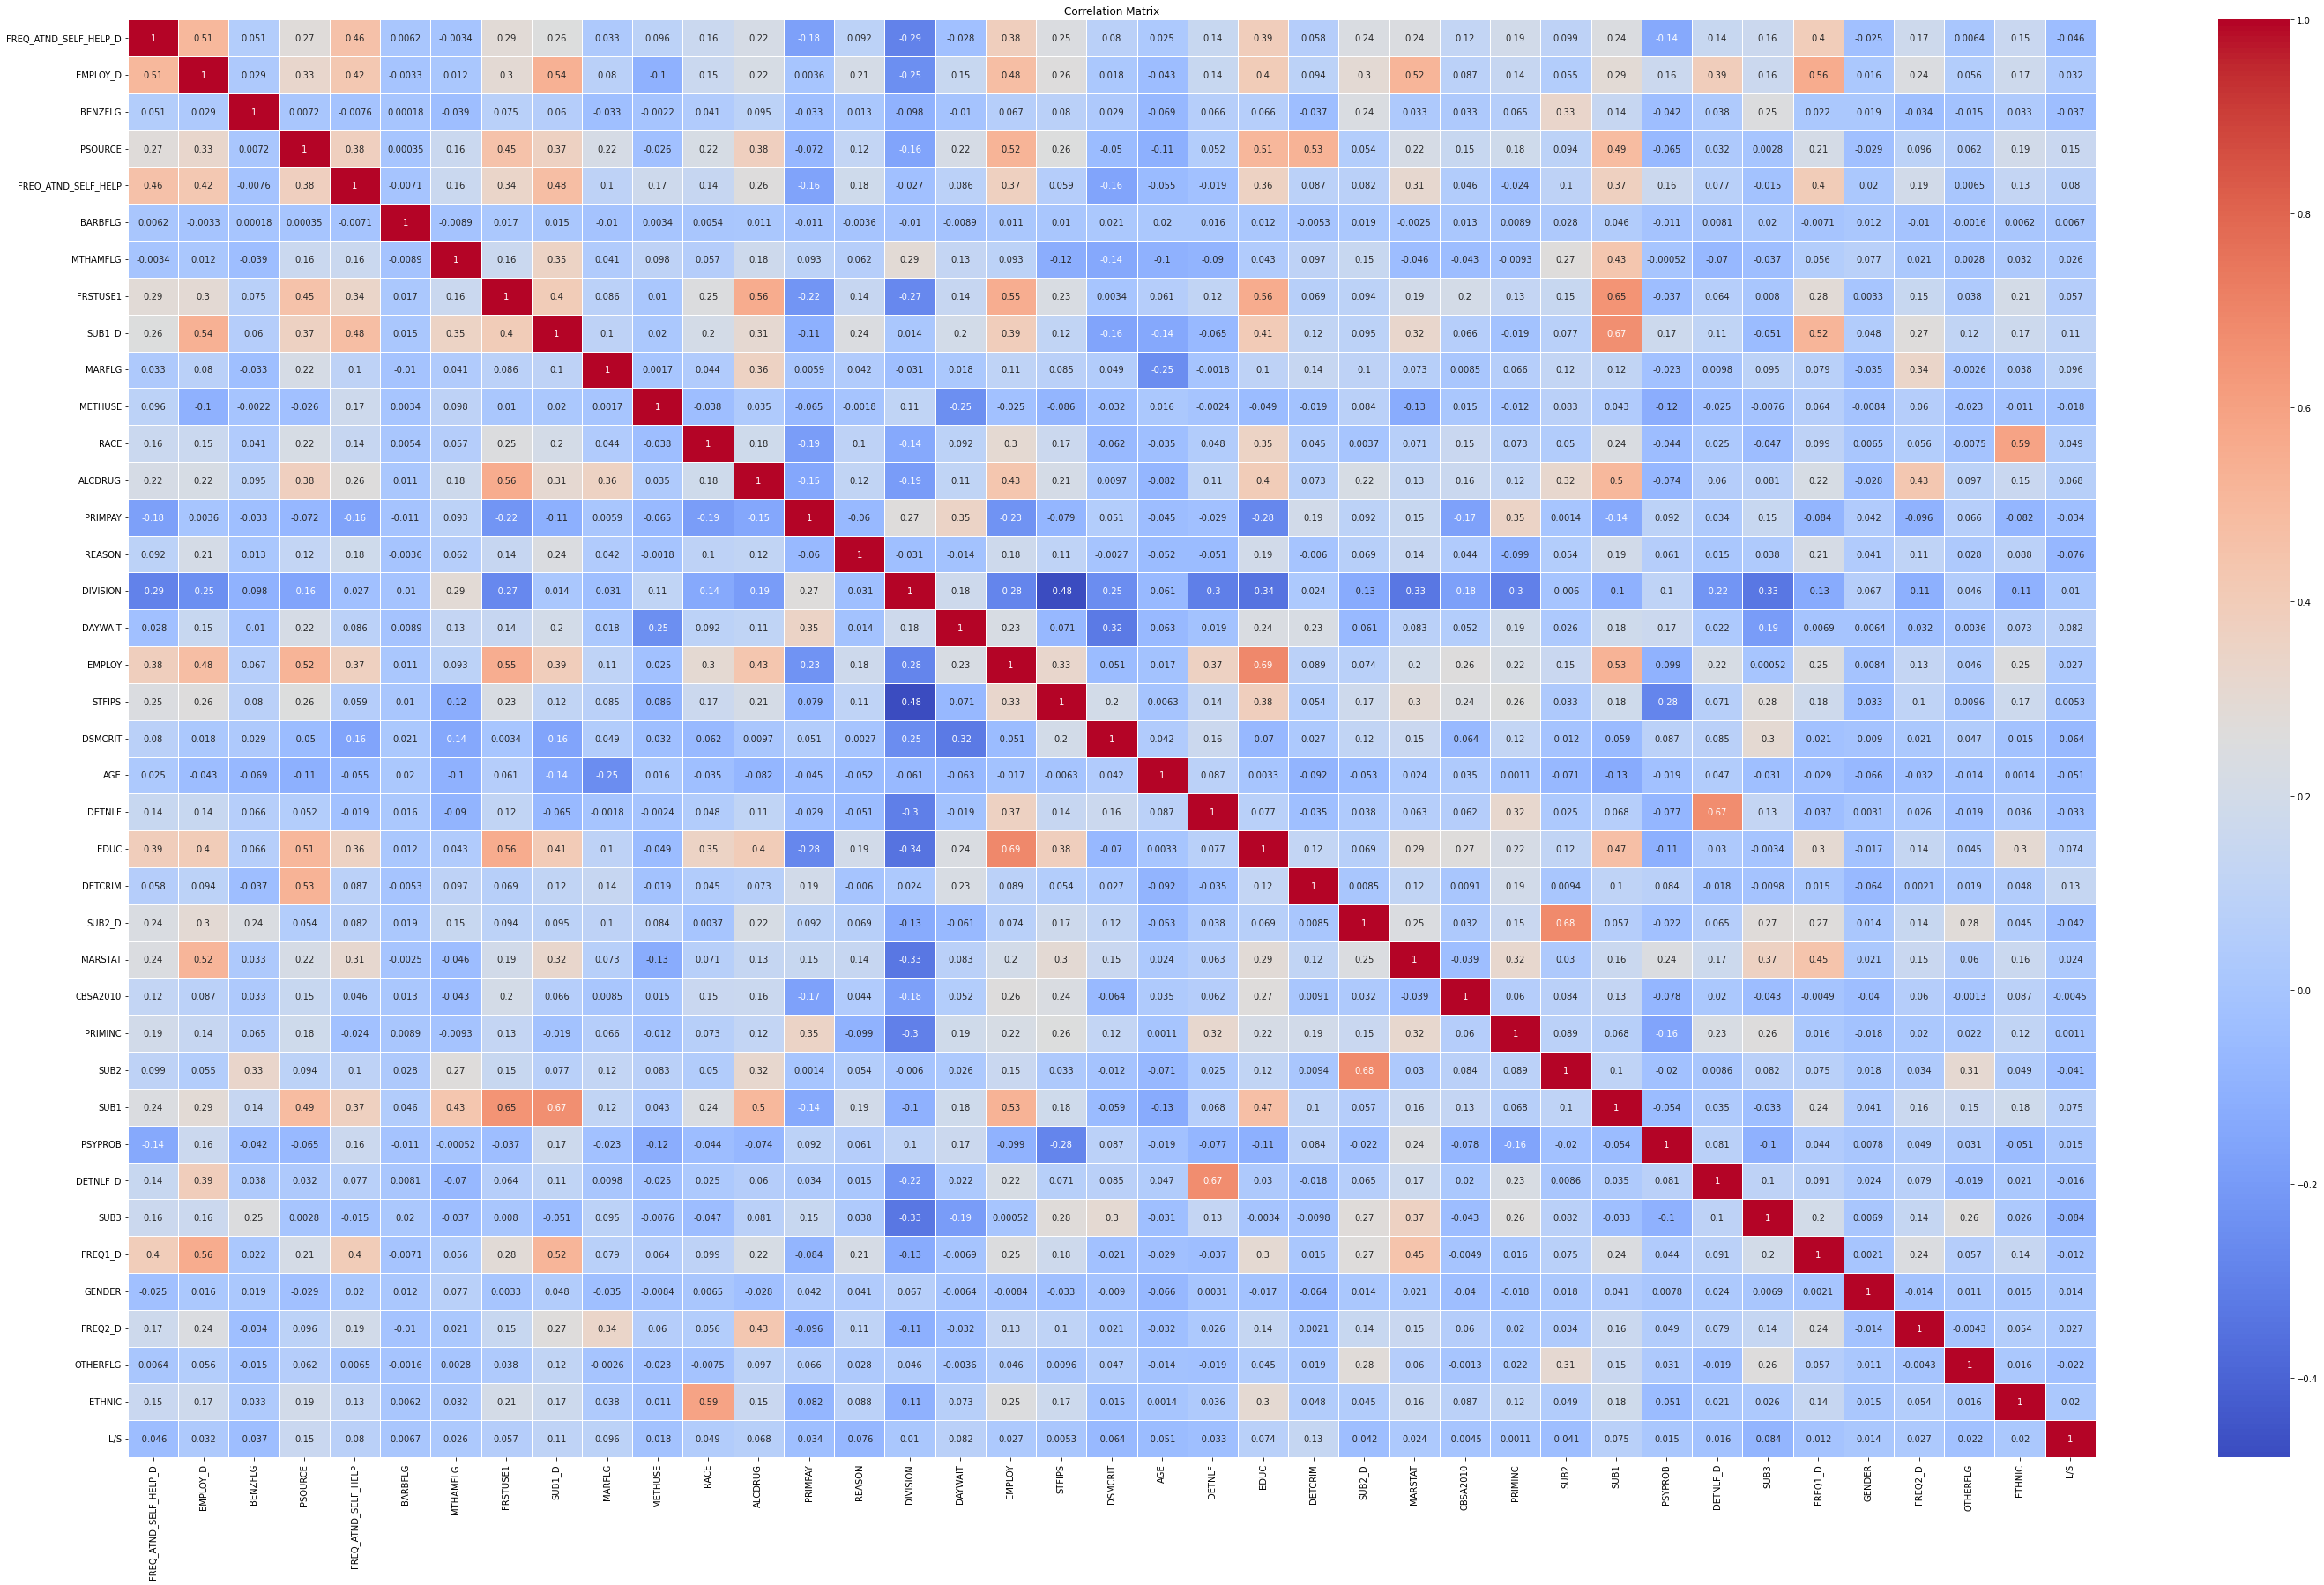

In [96]:
# Check correlation matrix again
correlation_matrix = df.corr()
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation Matrix')
plt.show()